In [77]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import show , xlabel , ylabel , plot , title , figure , legend
from tensorflow.keras import layers , models
from tensorflow.keras.metrics import mean_absolute_error , mean_squared_error
from tensorflow.data import Dataset

In [78]:
path = "D:\\datasets\\Turkey-Mugla\\Koycegiz.csv"
file = read_csv(path)
df = file.copy()
df.head(10)

,ID,Date,Location,Latitude,Longtitude,Magnitude,Depth,Record date
0,1,5/28/2005 11:17,KOYCEGiZ (MUGLA),37.1218,28.7193,3.1,12.3,01:52.6
1,2,7/5/2005 23:10,KOYCEGiZ (MUGLA),37.0787,28.7347,2.8,27.8,01:52.8
2,3,9/5/2005 14:39,KOYCEGiZ (MUGLA),37.1043,28.6722,2.9,32.6,01:52.9
3,4,10/16/2005 0:22,KOYCEGiZ (MUGLA),37.0352,28.5790,2.8,22.9,01:53.0
4,5,2/22/2006 9:01,KOYCEGiZ (MUGLA),37.0437,28.8388,3.0,9.6,01:53.3
5,6,3/5/2006 7:46,KOYCEGiZ (MUGLA),37.0210,28.6025,3.2,13.1,01:53.3
6,7,4/28/2006 8:48,KOYCEGiZ (MUGLA),37.0542,28.5810,3.1,6.1,01:53.4
7,8,5/9/2006 6:39,KOYCEGiZ (MUGLA),37.0510,28.8697,2.7,27.6,01:53.5
8,9,8/6/2006 14:57,KOYCEGiZ (MUGLA),37.1112,28.6970,2.8,8.2,01:53.7
9,10,10/30/2006 18:08,KOYCEGiZ (MUGLA),37.1290,28.6388,3.4,16.9,01:53.8


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1715 non-null   int64  
 1   Date         1715 non-null   object 
 2   Location     1715 non-null   object 
 3   Latitude     1715 non-null   float64
 4   Longtitude   1715 non-null   float64
 5   Magnitude    1715 non-null   float64
 6   Depth        1715 non-null   float64
 7   Record date  1715 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 107.3+ KB


# working on Magnitude column

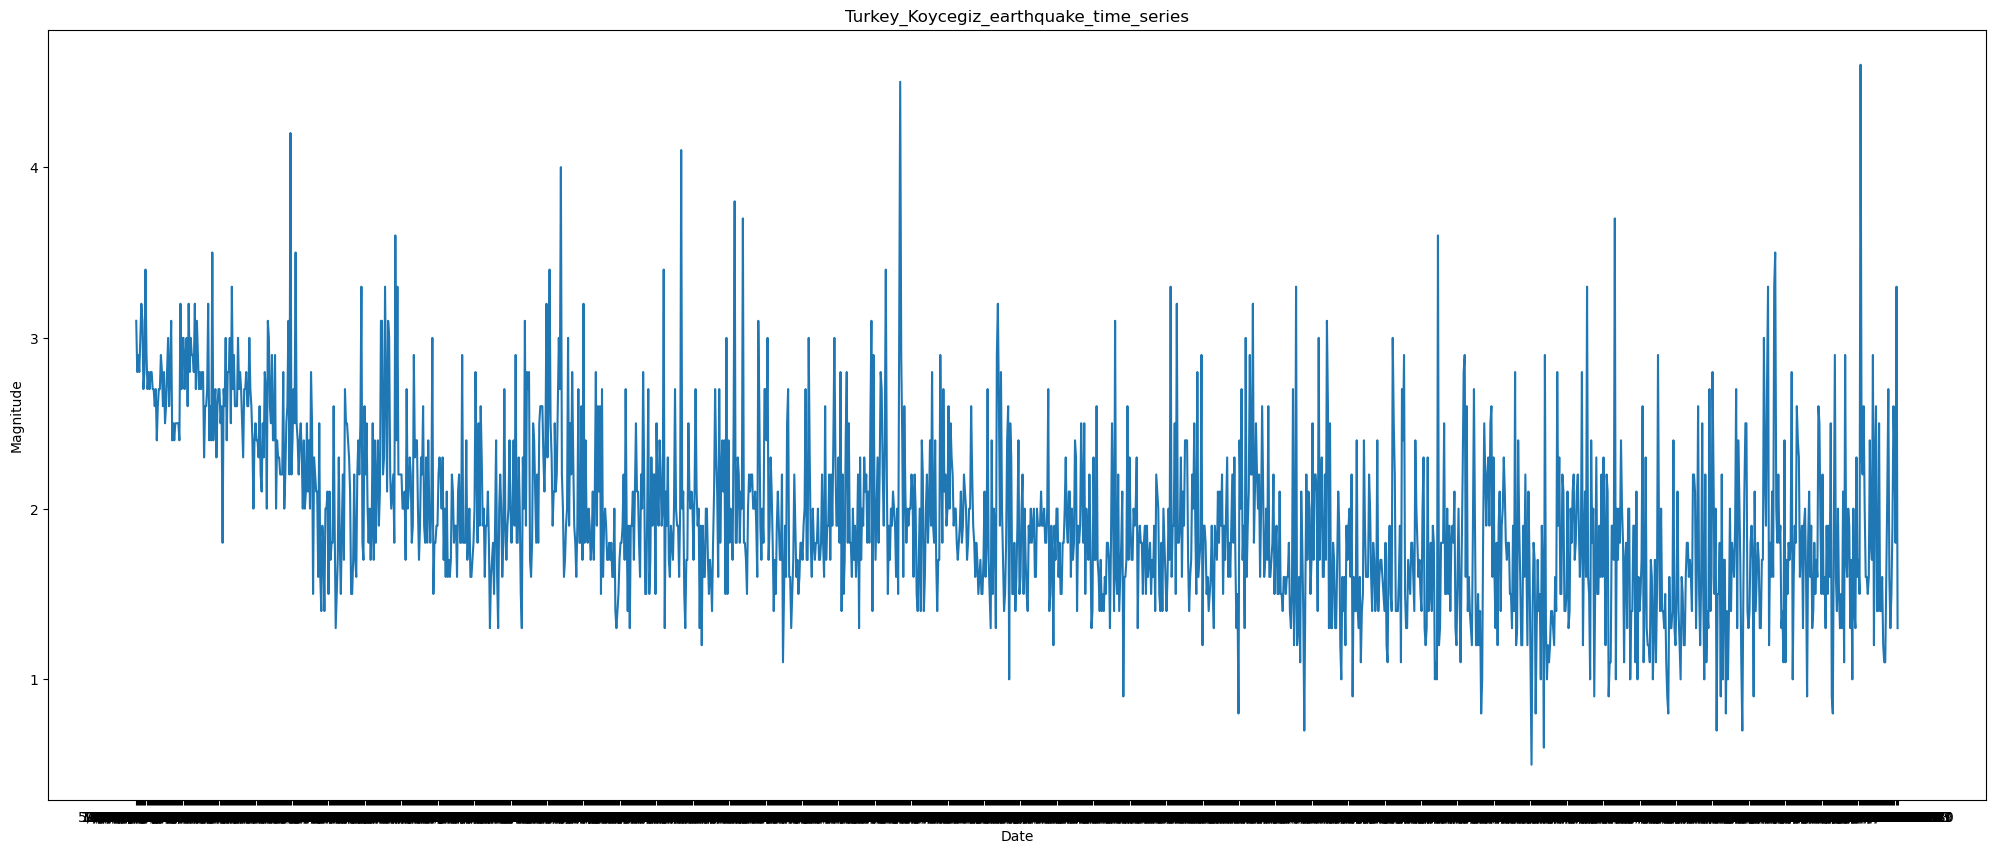

In [80]:
figure(figsize=(25,10))
plot(df.Date,df.Magnitude)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Koycegiz_earthquake_time_series')
show()

In [81]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Magnitude.to_list()[:idx]
xts = df.Magnitude.to_list()[idx:]

Enter train size:80


In [82]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 1372
Test size: 343


In [83]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [84]:
dataset_ts = Dataset.from_tensor_slices(df.Magnitude.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [85]:
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [86]:
history = Create_model().fit(dataset_tr,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 0.9296 - mae: 0.6148
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2455 - mae: 0.3762
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2577 - mae: 0.3801
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2316 - mae: 0.3651
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2225 - mae: 0.3622
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2294 - mae: 0.3645
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2371 - mae: 0.3685
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2201 - mae: 0.3600
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2157 - mae: 0.3551
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2193 - mae: 0.3546
Epoch 11/100
23/23 [==============================] - 0s 5m

23/23 [==============================] - 0s 5ms/step - loss: 0.1243 - mae: 0.2709
Epoch 88/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1223 - mae: 0.2727
Epoch 89/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1153 - mae: 0.2629
Epoch 90/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1217 - mae: 0.2693
Epoch 91/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1137 - mae: 0.2627
Epoch 92/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1182 - mae: 0.2661
Epoch 93/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1151 - mae: 0.2647
Epoch 94/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1153 - mae: 0.2612
Epoch 95/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1100 - mae: 0.2577
Epoch 96/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1072 - mae: 0.2560
Epoch 97/100
23/23 [==============================] - 0s 4ms/st

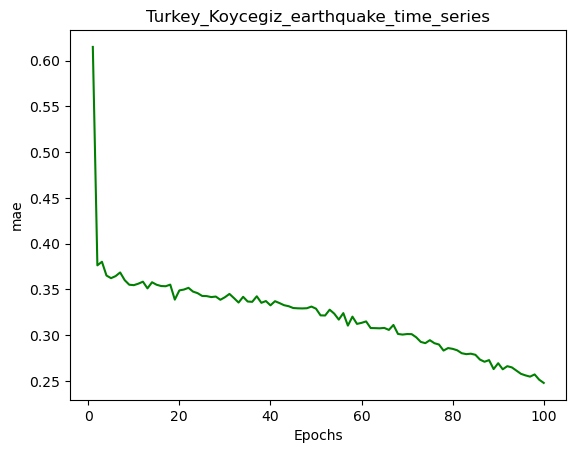

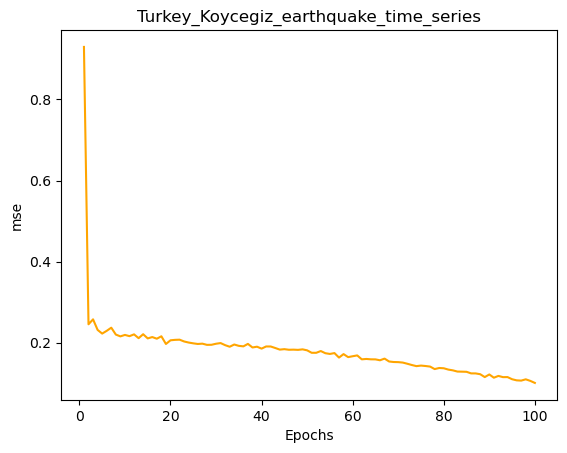

In [87]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Koycegiz_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Koycegiz_earthquake_time_series')
show()

In [138]:
preds_ts = Create_model().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

29/29 [==============================] - 0s 9ms/step
mse :  1 , mae :  1


In [139]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

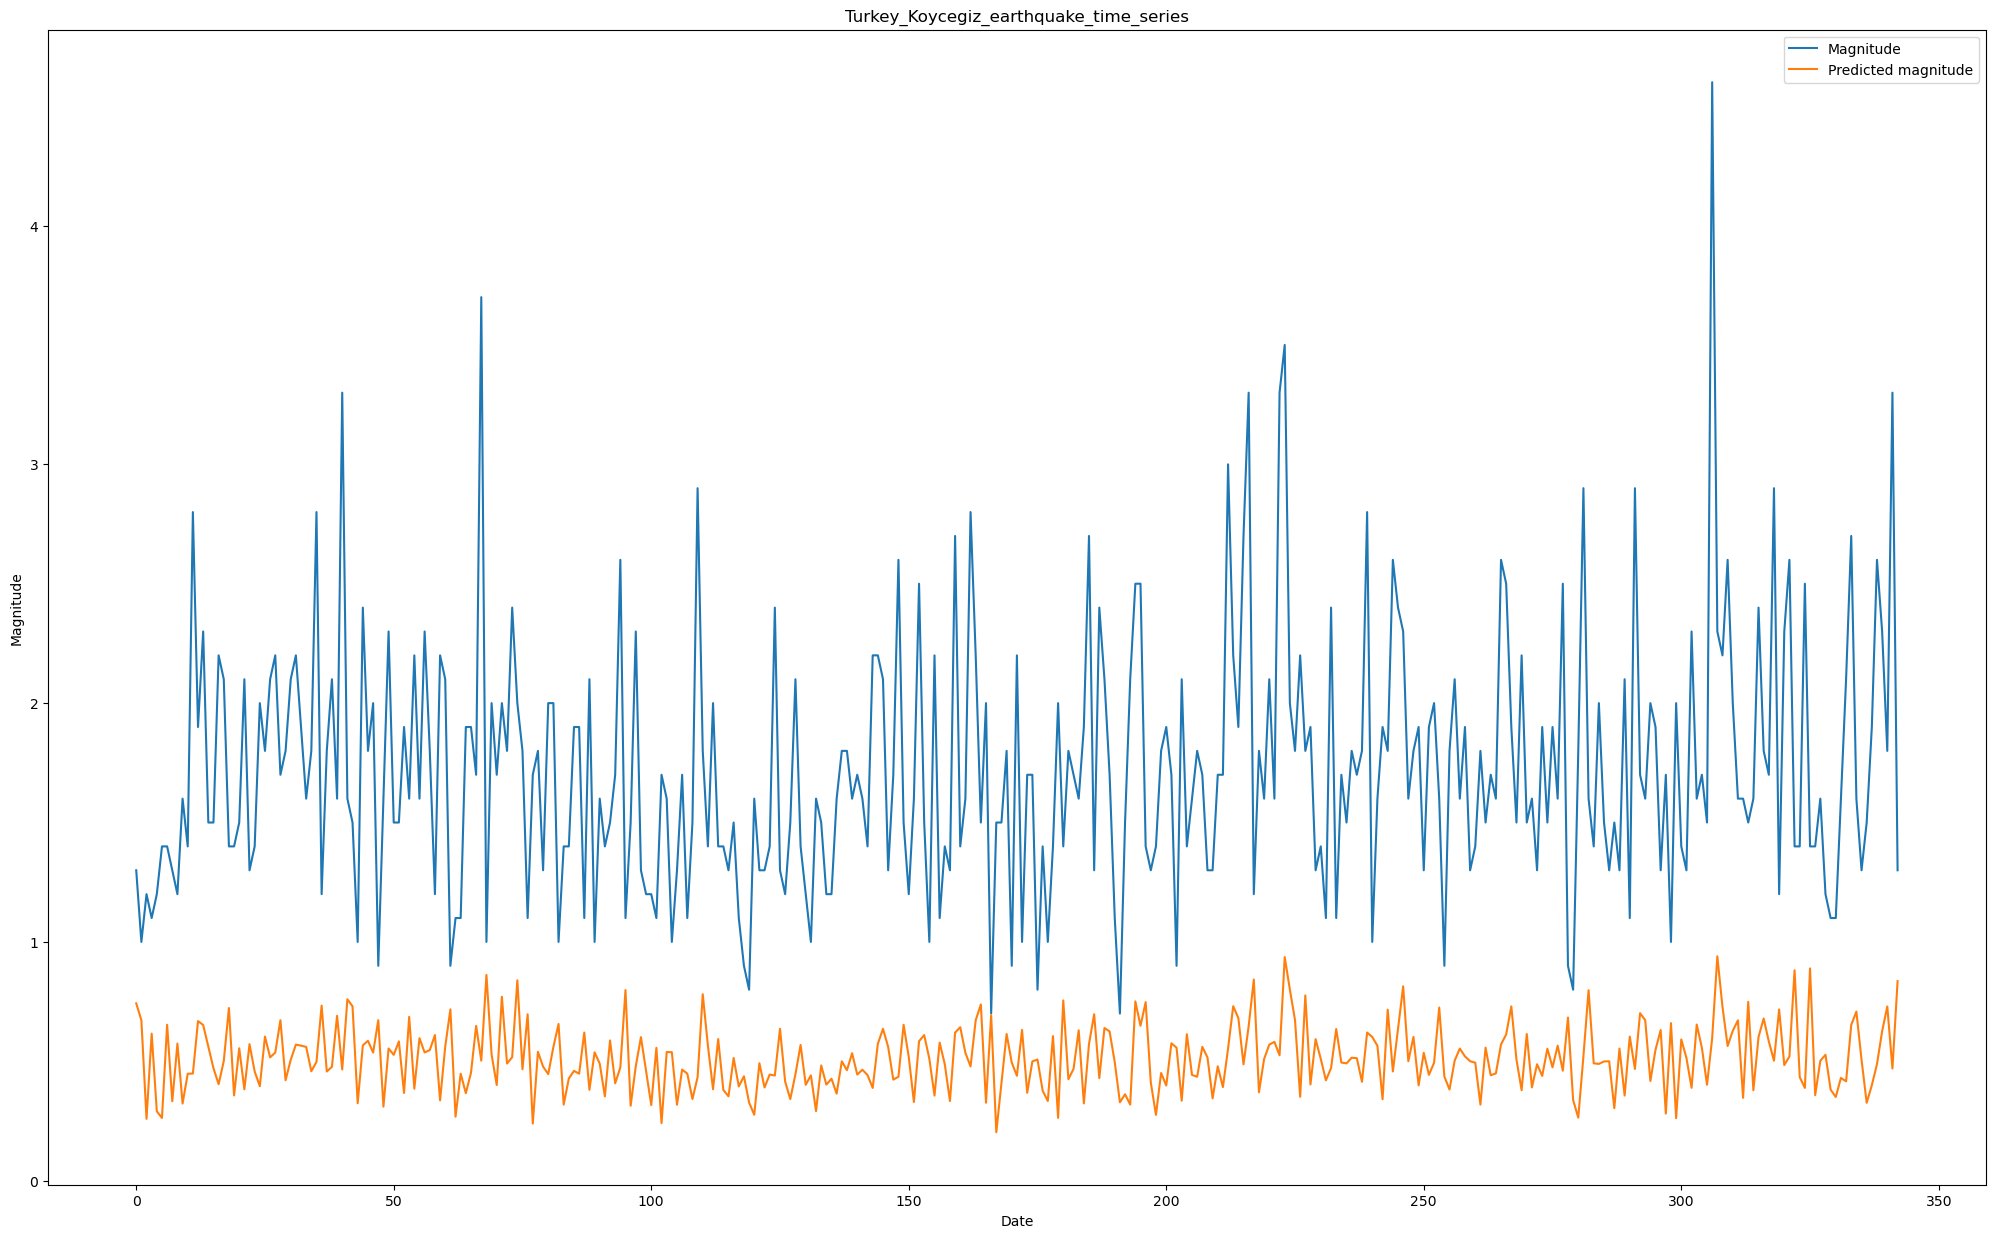

In [140]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Koycegiz_earthquake_time_series')
xlabel('Date')
ylabel('Magnitude')
legend(['Magnitude','Predicted magnitude'])
show()

# working on Depth column

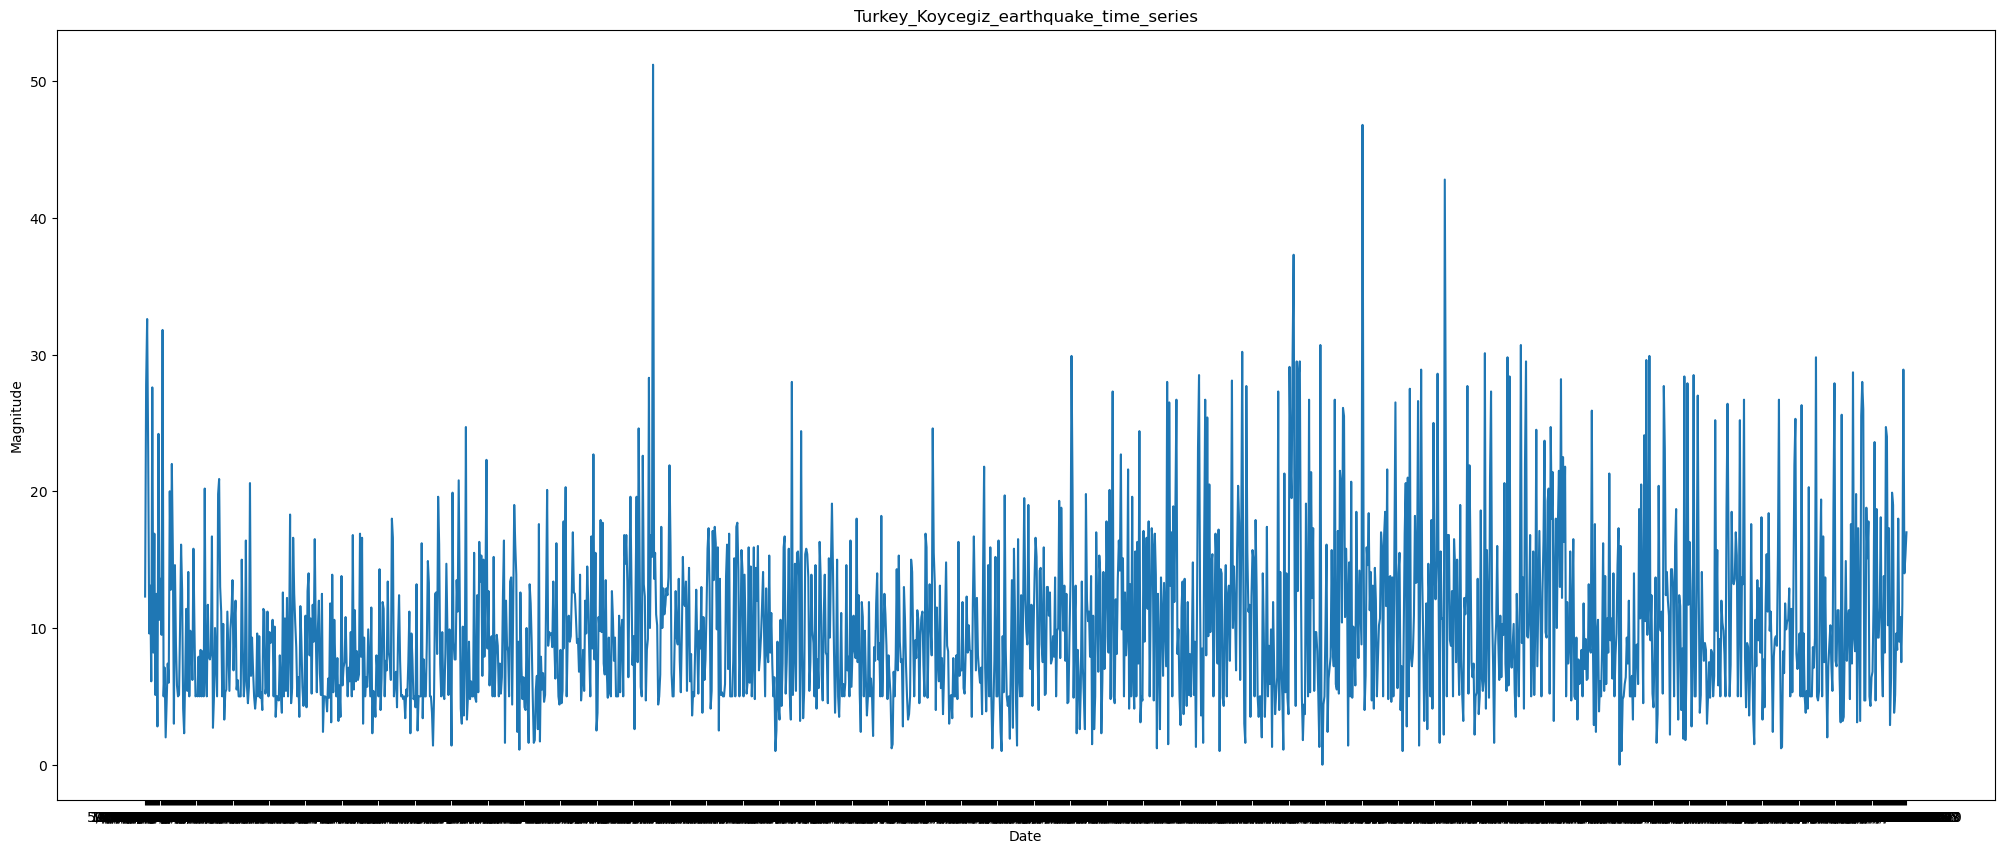

In [141]:
figure(figsize=(25,10))
plot(df.Date,df.Depth)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Koycegiz_earthquake_time_series')
show()

In [142]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Depth.to_list()[:idx]
xts = df.Depth.to_list()[idx:]

Enter train size:80


In [143]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 1372
Test size: 343


In [144]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [145]:
dataset_ts = Dataset.from_tensor_slices(df.Depth.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [146]:
def Create_model2()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [147]:
history = Create_model2().fit(dataset_tr,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 64.0197 - mae: 6.3248
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 37.4657 - mae: 4.6207
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 38.6498 - mae: 4.6982
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 37.1794 - mae: 4.5936
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 37.9112 - mae: 4.6502
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 37.5464 - mae: 4.6181
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 37.1434 - mae: 4.6268
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 37.2849 - mae: 4.6266
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 36.4974 - mae: 4.5610
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 36.8384 - mae: 4.6234
Epoch 11/100
23/23 [===========================

23/23 [==============================] - 0s 5ms/step - loss: 23.3185 - mae: 3.7005
Epoch 87/100
23/23 [==============================] - 0s 4ms/step - loss: 24.0873 - mae: 3.7319
Epoch 88/100
23/23 [==============================] - 0s 4ms/step - loss: 22.8577 - mae: 3.6306
Epoch 89/100
23/23 [==============================] - 0s 5ms/step - loss: 22.1375 - mae: 3.5714
Epoch 90/100
23/23 [==============================] - 0s 5ms/step - loss: 22.5257 - mae: 3.6249
Epoch 91/100
23/23 [==============================] - 0s 5ms/step - loss: 22.7539 - mae: 3.6108
Epoch 92/100
23/23 [==============================] - 0s 5ms/step - loss: 21.9221 - mae: 3.5957
Epoch 93/100
23/23 [==============================] - 0s 5ms/step - loss: 21.9668 - mae: 3.5714
Epoch 94/100
23/23 [==============================] - 0s 5ms/step - loss: 21.8158 - mae: 3.5635
Epoch 95/100
23/23 [==============================] - 0s 4ms/step - loss: 22.0520 - mae: 3.5775
Epoch 96/100
23/23 [==============================] -

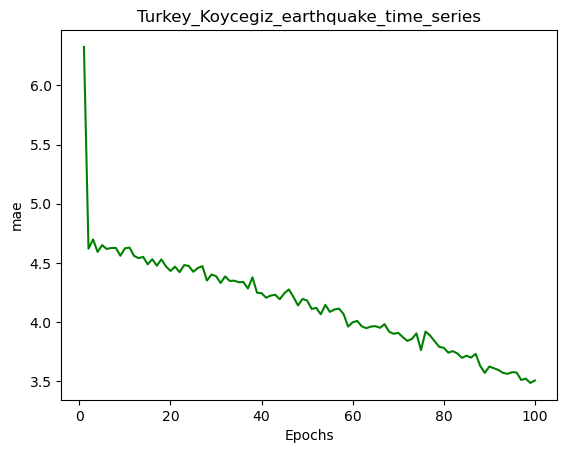

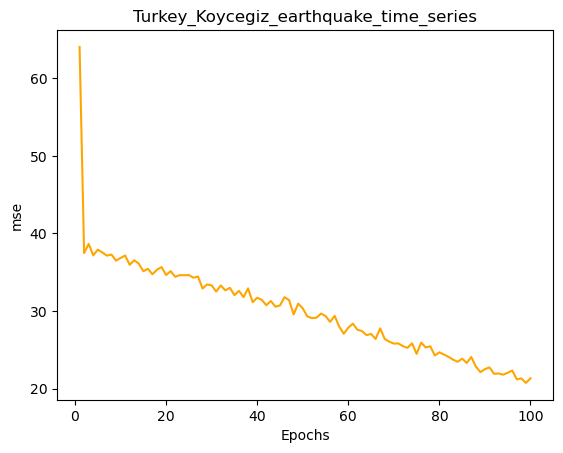

In [148]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Koycegiz_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Koycegiz_earthquake_time_series')
show()

In [152]:
preds_ts = Create_model2().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

29/29 [==============================] - 0s 5ms/step
mse : 75 , mae :  6


In [153]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

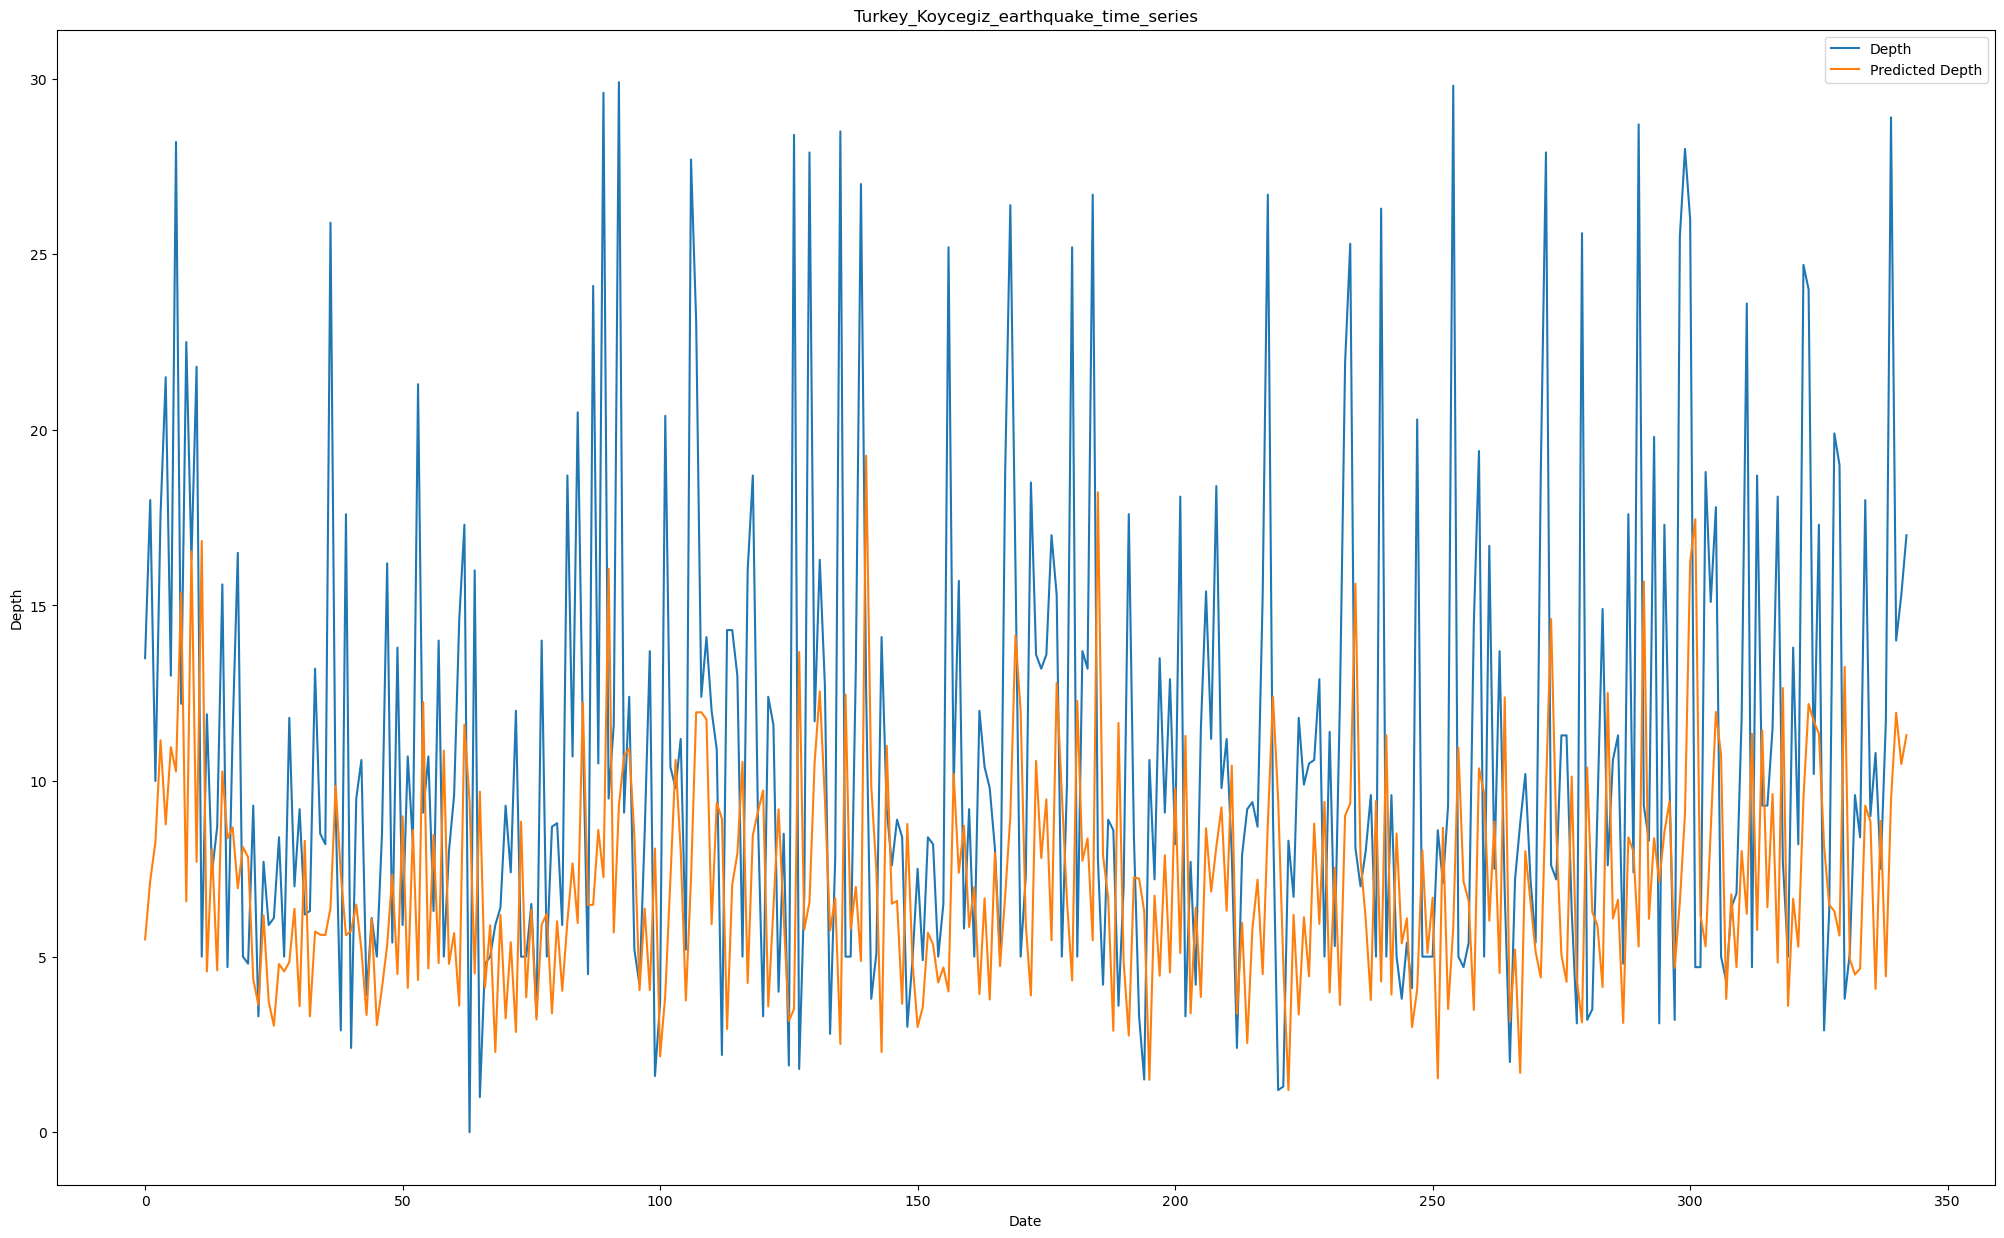

In [154]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Koycegiz_earthquake_time_series')
xlabel('Date')
ylabel('Depth')
legend(['Depth','Predicted Depth'])
show()